In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)

In [2]:
path = PureWindowsPath(os.getcwd() + "\\data\\input\\data.parquet")
path = path.as_posix()
corpus = pd.read_parquet(path) #engine="fastparquet"
corpus = corpus.sample(frac=1).reset_index(drop=True)
corpus

,id,message,message_preprocessed,category,length
0,3420,Le Damascène place cette d...,damascène place cette dist...,philosophy,261
1,8018,"Ainsi, le culte réformé pa...",ainsi culte réformé parole...,baptism,161
2,2662,Alors que Thomas et Jérôme...,alors thomas jérôme faisai...,philosophy,368
3,4429,**Q18-6 Y-a-t-il eu contra...,q- y-a-t-il contrariété en...,philosophy,69
4,2835,## Article 11: Le nom « Ce...,article nom « celui » est-...,philosophy,96
5,2433,Votre adresse e-mail ne se...,adresse e-mail publiée cha...,philosophy,86
6,6265,Enseigner ses enfants à ob...,enseigner enfant observer ...,baptism,275
7,7461,Maxime est étudiant en méd...,maxime étudiant médecine l...,baptism,413
8,7158,Cet autre extrait du trait...,cet autre extrait traité b...,baptism,1284
9,2279,**Est-il vrai de dire : « ...,est-il vrai dire « homme a...,philosophy,60


In [3]:
X = corpus["message_preprocessed"]
y = corpus["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [4]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [5]:
# entrainement du modele
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [8]:
# test du modele
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     baptism       0.97      0.91      0.93       916
  philosophy       0.95      0.98      0.96      1553

    accuracy                           0.95      2469
   macro avg       0.96      0.94      0.95      2469
weighted avg       0.95      0.95      0.95      2469



In [10]:
# on affiche les documents a propos desquels le modele s'est trompe
corpus_test = pd.DataFrame({"message_preprocessed":X_test, "truth":y_test, "pred":y_pred})
corpus_test_errors = corpus_test.query("truth != pred")
corpus_test_errors = corpus_test_errors[["truth", "pred", "message_preprocessed"]]
corpus_test_errors.to_csv("data/output/prediction_errors.csv", index=False)
corpus_test_errors

,truth,pred,message_preprocessed
7282,baptism,philosophy,salut a sens quand sait fa...
6951,baptism,philosophy,parler enfant légitime non...
5458,baptism,philosophy,« capacité tolérer erreur ...
1192,baptism,philosophy,adresse e-mail publiée cha...
7168,philosophy,baptism,issue cette série crois pr...
7496,philosophy,baptism,jesus loves this i know fo...
3981,baptism,philosophy,médecine devriez savoir mo...
7121,baptism,philosophy,question – comment jésus f...
5140,baptism,philosophy,théorie juste faire beau p...
4430,baptism,philosophy,ceci comme dit frère chari...


In [27]:
print(X_train_tfidf)
X_train_tfidf

  (0, 10537)	0.1633796530792109
  (0, 9621)	0.16311183154213169
  (0, 6435)	0.1863294158248605
  (0, 1217)	0.20225278534533037
  (0, 899)	0.16364960867493525
  (0, 2875)	0.1982623846690439
  (0, 8694)	0.20141621819938454
  (0, 3188)	0.1633796530792109
  (0, 4043)	0.15549858464531688
  (0, 2871)	0.20225278534533037
  (0, 2370)	0.302969034023444
  (0, 10839)	0.1658903754472704
  (0, 9932)	0.20141621819938454
  (0, 10142)	0.23542986649050418
  (0, 4278)	0.1658903754472704
  (0, 7443)	0.09624627443210154
  (0, 1187)	0.11016897123390608
  (0, 8159)	0.1325522042436035
  (0, 1652)	0.19346321058538868
  (0, 1532)	0.09870571208225545
  (0, 3975)	0.3875293898720343
  (0, 7176)	0.15702395311287512
  (0, 551)	0.20225278534533037
  (0, 7337)	0.3326323467475601
  (0, 2758)	0.13148209568170482
  :	:
  (5757, 6354)	0.23637652912131488
  (5757, 471)	0.21866570713650957
  (5757, 3394)	0.20870692582331513
  (5757, 7145)	0.23933253771548715
  (5757, 3582)	0.22646943485964777
  (5757, 9164)	0.1695026917244

<5759x11169 sparse matrix of type '<class 'numpy.float64'>'
	with 133628 stored elements in Compressed Sparse Row format>

In [22]:
print("X_train_tfidf.shape =", X_train_tfidf.shape)
print("X_train_tfidf.data.shape =", X_train_tfidf.data.shape)
print("tfidf_vectorizer.idf_.shape =", tfidf_vectorizer.idf_.shape)

X_train_tfidf.shape = (5759, 11169)
X_train_tfidf.data.shape = (133628,)
tfidf_vectorizer.idf_.shape = (11169,)


In [92]:
# on affiche les poids des mots tfidf
idf = tfidf_vectorizer.idf_
scores_tfidf = pd.DataFrame({"words":tfidf_vectorizer.get_feature_names(), "idf":idf})
scores_tfidf = scores_tfidf.sort_values("idf", ascending=False)
scores_tfidf

c:\Users\eupho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,words,idf
0,aaaayaajpgpadqthechildofth...,8.965546
5824,lexpérience,8.965546
5857,lillback,8.965546
5852,ligament,8.965546
5844,licence,8.965546
5841,libérateur,8.965546
5840,libéralité,8.965546
5836,librement,8.965546
5834,liberum,8.965546
5831,liberalisme,8.965546


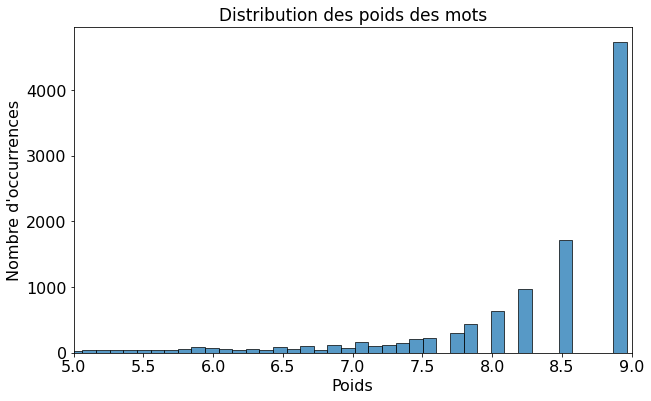

In [101]:
# Distribution des poids des mots (calcules avec sklearn)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution.png")
path = path.as_posix()

sb.histplot(data=scores_tfidf, x="idf")
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids des mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(5, 9)
plt.savefig(path)
plt.show()

In [17]:
# Calcul manuel des poids
print("X_train_tfidf.shape =", X_train_tfidf.shape)
words_weights = X_train_tfidf.sum(axis=0)
print("words_weights.shape =", words_weights.shape)
print(words_weights)
print(words_weights.shape)

X_train_tfidf.shape = (5759, 11195)
words_weights.shape = (1, 11195)
[[0.28800143 0.37253389 1.02558937 ... 0.12627303 0.22995188 0.68985563]]
(1, 11195)


In [18]:
words_weights = np.ravel(words_weights)
print(words_weights)
print(words_weights.shape)

[0.28800143 0.37253389 1.02558937 ... 0.12627303 0.22995188 0.68985563]
(11195,)


In [33]:
# words_weights[:10]
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.unique(words_weights).shape
np.max(words_weights)
np.min(words_weights)

0.03308810017497847

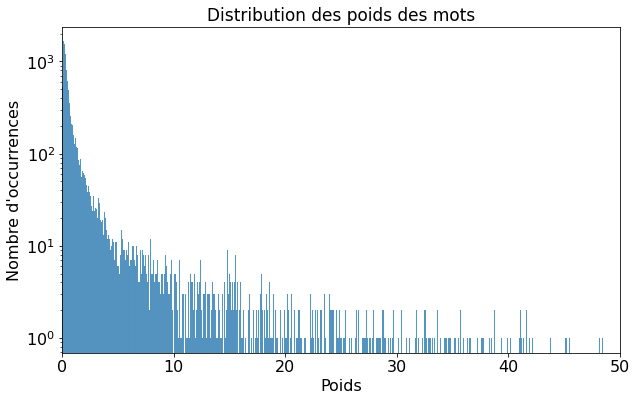

In [36]:
# Distribution des poids des mots (calcules avec a la main)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution_manuel.png")
path = path.as_posix()

# sb.histplot(words_weights[:100000])
sb.histplot(words_weights)
plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids des mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 50)
plt.savefig(path)
plt.show()